In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Reading data file
filepath = "data/VA_OutcomesMeasures_October2016_CMS_Submission.xlsx"

In [2]:
# Getting info from death rate sheet
main_dr_df = pd.read_excel(filepath, sheet_name="Death Rates")
main_dr_df.dropna()
main_dr_df.head()

,CCN#,VHA Facility,Address,City,State,Zip\nCode,Measure,Disease Cohort,Rate,95% Confidence Lower Limit,95% Confidence Upper Limit,VHA\n National Rate,Number of\n Observations,Number of\n Deaths,Footnotes,Date Range
0,01014F,BIRMINGHAM VA MEDICAL CENTER,700 SOUTH 19TH STREET,BIRMINGHAM,AL,35233.0,VA 30-day Death Rates,Acute Myocardial Infarction (AMI),9.68,7.35,12.84,9.21,134,14,NaN,October 2013 – September 2015
1,01014F,BIRMINGHAM VA MEDICAL CENTER,700 SOUTH 19TH STREET,BIRMINGHAM,AL,35233.0,VA 30-day Death Rates,Congestive Heart Failure (CHF),6.89,5.17,9.3,7.72,389,25,NaN,October 2013 – September 2015
2,01014F,BIRMINGHAM VA MEDICAL CENTER,700 SOUTH 19TH STREET,BIRMINGHAM,AL,35233.0,VA 30-day Death Rates,Pneumonia (PN),9.17,7.01,11.98,8.64,148,16,NaN,October 2013 – September 2015
3,01019F,VA CENTRAL ALABAMA HEALTHCARE SYSTEM - MONTGOMERY,215 PERRY HILL ROAD,MONTGOMERY,AL,36109.0,VA 30-day Death Rates,Acute Myocardial Infarction (AMI),*,*,*,9.21,8,1,* Rates are not reported for Observations < 25,October 2013 – September 2015
4,01019F,VA CENTRAL ALABAMA HEALTHCARE SYSTEM - MONTGOMERY,215 PERRY HILL ROAD,MONTGOMERY,AL,36109.0,VA 30-day Death Rates,Congestive Heart Failure (CHF),7.15,4.81,10.38,7.72,85,4,NaN,October 2013 – September 2015


In [3]:
# Extract just Georgia and Virginia information from main data frame
va_ga_dr_df = main_dr_df[(main_dr_df["State"]== 'VA') |    (main_dr_df["State"]== 'GA')]

# Replace values that have "*" with "NaN" so that we can then use .dropna to get rid of the rows with missing information
va_ga_dr_df['Rate']= va_ga_dr_df['Rate'].replace({"*": np.nan})
va_ga_dr_df['95% Confidence Lower Limit']= va_ga_dr_df['95% Confidence Lower Limit'].replace({"*": np.nan})
va_ga_dr_df['95% Confidence Upper Limit']= va_ga_dr_df['95% Confidence Upper Limit'].replace({"*": np.nan})

# Delete columns with unnecessary information
del va_ga_dr_df["Footnotes"]
del va_ga_dr_df["Date Range"]

# Dropna 
va_ga_dr_df = va_ga_dr_df.dropna()

# Rename columns to remove \n typo
va_ga_dr_df = va_ga_dr_df.rename(columns={"Zip\nCode": "Zip Code",
                           "VHA\n National Rate": "VHA National Rate",
                           "Number of\n Observations": "Number Observations",
                           "Number of\n Deaths": "Number Deaths"})

# Print df
va_ga_dr_df.head()

<ipython-input-3-d5b912f7c874>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  va_ga_dr_df['Rate']= va_ga_dr_df['Rate'].replace({"*": np.nan})
<ipython-input-3-d5b912f7c874>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  va_ga_dr_df['95% Confidence Lower Limit']= va_ga_dr_df['95% Confidence Lower Limit'].replace({"*": np.nan})
<ipython-input-3-d5b912f7c874>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instea

,CCN#,VHA Facility,Address,City,State,Zip Code,Measure,Disease Cohort,Rate,95% Confidence Lower Limit,95% Confidence Upper Limit,VHA National Rate,Number Observations,Number Deaths
78,11029F,DECATUR (ATLANTA) VA MEDICAL CENTER,1670 CLAIRMONT ROAD,DECATUR,GA,30033.0,VA 30-day Death Rates,Acute Myocardial Infarction (AMI),8.89,6.48,11.90,9.21,116,7
79,11029F,DECATUR (ATLANTA) VA MEDICAL CENTER,1670 CLAIRMONT ROAD,DECATUR,GA,30033.0,VA 30-day Death Rates,Congestive Heart Failure (CHF),5.59,4.27,7.28,7.72,621,24
80,11029F,DECATUR (ATLANTA) VA MEDICAL CENTER,1670 CLAIRMONT ROAD,DECATUR,GA,30033.0,VA 30-day Death Rates,Pneumonia (PN),7.31,5.59,9.50,8.64,280,15
81,11030F,AUGUSTA VA MEDICAL CENTER,950 15TH STREET,AUGUSTA,GA,30901.0,VA 30-day Death Rates,Acute Myocardial Infarction (AMI),10.27,7.53,14.16,9.21,63,8
82,11030F,AUGUSTA VA MEDICAL CENTER,950 15TH STREET,AUGUSTA,GA,30901.0,VA 30-day Death Rates,Congestive Heart Failure (CHF),8.08,6.12,10.86,7.72,263,19


In [4]:
# Creating a data frame for georgia information
ga_dr_df = va_ga_dr_df[va_ga_dr_df["State"]=="GA"]

# Print df
ga_dr_df.head()

,CCN#,VHA Facility,Address,City,State,Zip Code,Measure,Disease Cohort,Rate,95% Confidence Lower Limit,95% Confidence Upper Limit,VHA National Rate,Number Observations,Number Deaths
78,11029F,DECATUR (ATLANTA) VA MEDICAL CENTER,1670 CLAIRMONT ROAD,DECATUR,GA,30033.0,VA 30-day Death Rates,Acute Myocardial Infarction (AMI),8.89,6.48,11.90,9.21,116,7
79,11029F,DECATUR (ATLANTA) VA MEDICAL CENTER,1670 CLAIRMONT ROAD,DECATUR,GA,30033.0,VA 30-day Death Rates,Congestive Heart Failure (CHF),5.59,4.27,7.28,7.72,621,24
80,11029F,DECATUR (ATLANTA) VA MEDICAL CENTER,1670 CLAIRMONT ROAD,DECATUR,GA,30033.0,VA 30-day Death Rates,Pneumonia (PN),7.31,5.59,9.50,8.64,280,15
81,11030F,AUGUSTA VA MEDICAL CENTER,950 15TH STREET,AUGUSTA,GA,30901.0,VA 30-day Death Rates,Acute Myocardial Infarction (AMI),10.27,7.53,14.16,9.21,63,8
82,11030F,AUGUSTA VA MEDICAL CENTER,950 15TH STREET,AUGUSTA,GA,30901.0,VA 30-day Death Rates,Congestive Heart Failure (CHF),8.08,6.12,10.86,7.72,263,19


Text(0.5, 1.0, 'Death Rate Average (%) per VHA Facilities in Georgia')

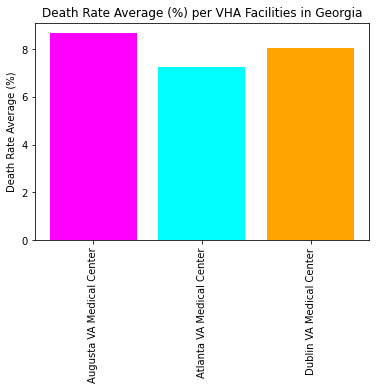

In [49]:
# Group by Hospital
ga_grouped_hos = ga_dr_df.groupby(['VHA Facility'])
ga_grouped_hos.head()

# Creating vizualization for Georgia Hospitals
x_axis = np.arange(len(ga_grouped_hos['VHA Facility']))
plt.bar(x_axis, ga_grouped_hos['Rate'].mean(), color=["magenta", "cyan", "orange"])

# Cleaning bar chart format
tick_locations = x_axis
plt.xticks(tick_locations, ga_grouped_hos['VHA Facility'])
plt.xticks(np.arange(3), ['Augusta VA Medical Center', 'Atlanta VA Medical Center', 'Dublin VA Medical Center'], rotation=90)
plt.ylabel("Death Rate Average (%)")
plt.title("Death Rate Average (%) per VHA Facilities in Georgia")

Text(0.5, 1.0, 'Total Number of Deaths per VHA Facilities in Georgia')

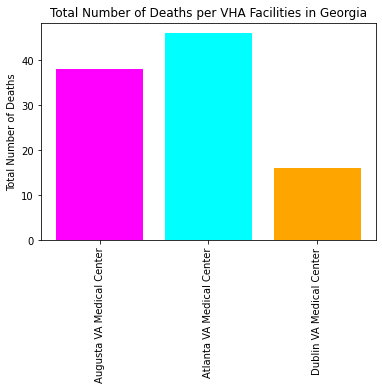

In [50]:
# Creating another vizualization
x_axis = np.arange(len(ga_grouped_hos['VHA Facility']))
plt.bar(x_axis, ga_grouped_hos['Number Deaths'].sum(), color=["magenta", "cyan", "orange"])

# Cleaning bar chart format
tick_locations = x_axis
plt.xticks(tick_locations, ga_grouped_hos['VHA Facility'])
plt.xticks(np.arange(3), ['Augusta VA Medical Center', 'Atlanta VA Medical Center', 'Dublin VA Medical Center'], rotation=90)
plt.ylabel("Total Number of Deaths")
plt.title("Total Number of Deaths per VHA Facilities in Georgia")

In [6]:
# Creating a data frame for virginia information
va_dr_df = va_ga_dr_df[va_ga_dr_df["State"]=="VA"]

# Print df
va_dr_df.head()

,CCN#,VHA Facility,Address,City,State,Zip Code,Measure,Disease Cohort,Rate,95% Confidence Lower Limit,95% Confidence Upper Limit,VHA National Rate,Number Observations,Number Deaths
343,49006F,HAMPTON VA MEDICAL CENTER,100 EMANCIPATION DRIVE,HAMPTON,VA,23667.0,VA 30-day Death Rates,Congestive Heart Failure (CHF),7.63,5.16,10.52,7.72,123,8
344,49006F,HAMPTON VA MEDICAL CENTER,100 EMANCIPATION DRIVE,HAMPTON,VA,23667.0,VA 30-day Death Rates,Pneumonia (PN),8.94,6.49,11.85,8.64,85,8
345,49010F,RICHMOND VA MEDICAL CENTER,1201 BROAD ROCK BOULEVARD,RICHMOND,VA,23249.0,VA 30-day Death Rates,Acute Myocardial Infarction (AMI),8.93,6.65,11.80,9.21,148,12
346,49010F,RICHMOND VA MEDICAL CENTER,1201 BROAD ROCK BOULEVARD,RICHMOND,VA,23249.0,VA 30-day Death Rates,Congestive Heart Failure (CHF),7.84,6.16,9.85,7.72,543,41
347,49010F,RICHMOND VA MEDICAL CENTER,1201 BROAD ROCK BOULEVARD,RICHMOND,VA,23249.0,VA 30-day Death Rates,Pneumonia (PN),9.61,7.71,12.06,8.64,253,29


In [ ]:
# Creating vizualizations for Virginia Hospitals